# Pair Programming Intro Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
import datetime
import statsmodels.api as sm
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

In [3]:
# este DF extraido de Kaggle muestra las ventas en dólares de una cadena de supermercados estadounidense que vende cafés e infusiones

sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales.csv")
sales.sample(7)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
2476,617,Massachusetts,East,Major Market,29.0,49.0,82.0,33.0,20.0,9.0,870.0,40.0,30.0,50.0,80.0,11,12/01/10 00:00:00,Tea,Darjeeling,Regular
3195,773,Illinois,Central,Major Market,362.0,392.0,681.0,295.0,121.0,97.0,1714.0,340.0,340.0,470.0,810.0,5,08/01/11 00:00:00,Espresso,Caffe Mocha,Regular
2073,563,Iowa,Central,Small Market,141.0,229.0,457.0,228.0,88.0,63.0,1436.0,140.0,190.0,210.0,400.0,11,02/01/10 00:00:00,Tea,Darjeeling,Regular
1389,475,Connecticut,East,Small Market,-7.0,66.0,112.0,47.0,66.0,42.0,622.0,20.0,40.0,70.0,110.0,5,07/01/11 00:00:00,Espresso,Caffe Mocha,Regular
3227,774,Massachusetts,East,Major Market,12.0,26.0,44.0,18.0,16.0,5.0,486.0,20.0,10.0,30.0,40.0,13,07/01/11 00:00:00,Tea,Green Tea,Regular
670,318,Louisiana,South,Small Market,1.0,87.0,150.0,63.0,86.0,57.0,187.0,0.0,50.0,70.0,120.0,4,03/01/10 00:00:00,Espresso,Caffe Latte,Regular
934,405,Oklahoma,South,Small Market,33.0,80.0,155.0,65.0,58.0,24.0,403.0,20.0,60.0,70.0,130.0,8,12/01/11 00:00:00,Herbal Tea,Chamomile,Decaf


### Esta es la descripción de nuestras columnas:

- area_code: código de área

- state: estado (EEUU) de la tienda 

- market: región de la tienda (West, Central, East, South)

- market_size: tamaño de la tienda (Small Market, Major Market)

- profit: beneficio en $

- margin: beneficio por cada producto ($)

- sales: valores adquiridos en las ventas ($)

- cogs: coste de los productos vendidos ($)

- total_expenses: gastos totales para conseguir vender el producto ($)

- marketing: gastos de marketing ($)

- inventory: valor de inventario de producto en el momento de la venta ($)

- budget_profit: beneficio esperado ($)

- budget_cogs: presupuesto de coste de productos vendidos ($)

- budget_margin: pres. beneficio + gastos totales o pres ventas - pres. cogs ($)

- budget_sales: presupuesto de ventas ($)

- productid: id de producto

- date: fecha de venta (dd/mm/aaaa)

- product_type: categoría de producto (Espresso, Coffe, Herbal, Tea)

- product: descripción del producto

- type: tipo (Regular, Decaf)

### Partimos de la base de que nuestra variable respuesta va a ser "Profit" (beneficio).

# Objetivos

Los objetivos de hoy son:

 - Buscar un conjunto de datos a analizar:

Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Happy coding 📊📈📉

Empezamos a conocer nuestros datos:

In [4]:
nuevas_columnas = {col:col.lower().replace(' ','_') for col in sales.columns}
sales.rename(columns=nuevas_columnas, inplace = True)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_code       4248 non-null   int64  
 1   state           4248 non-null   object 
 2   market          4248 non-null   object 
 3   market_size     4248 non-null   object 
 4   profit          4248 non-null   float64
 5   margin          4248 non-null   float64
 6   sales           4248 non-null   float64
 7   cogs            4248 non-null   float64
 8   total_expenses  4248 non-null   float64
 9   marketing       4248 non-null   float64
 10  inventory       4248 non-null   float64
 11  budget_profit   4248 non-null   float64
 12  budget_cogs     4248 non-null   float64
 13  budget_margin   4248 non-null   float64
 14  budget_sales    4248 non-null   float64
 15  productid       4248 non-null   int64  
 16  date            4248 non-null   object 
 17  product_type    4248 non-null   o

In [6]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
area_code,4248.0,582.278013,221.140310,203.0,417.00,573.0,772.0,985.0
profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
cogs,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
total_expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
budget_profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
budget_cogs,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0


In [7]:
sales.isnull().sum()

area_code         0
state             0
market            0
market_size       0
profit            0
margin            0
sales             0
cogs              0
total_expenses    0
marketing         0
inventory         0
budget_profit     0
budget_cogs       0
budget_margin     0
budget_sales      0
productid         0
date              0
product_type      0
product           0
type              0
dtype: int64

In [8]:
sales.duplicated().sum()

0

In [9]:
# modificamos el tipo de dato de la columna fecha

sales["date"] = sales["date"].astype("datetime64")

In [10]:
sales["date"].dtypes

dtype('<M8[ns]')

In [11]:
# empezamos a estudiar los outliers

sales_num = sales.select_dtypes(include=np.number)

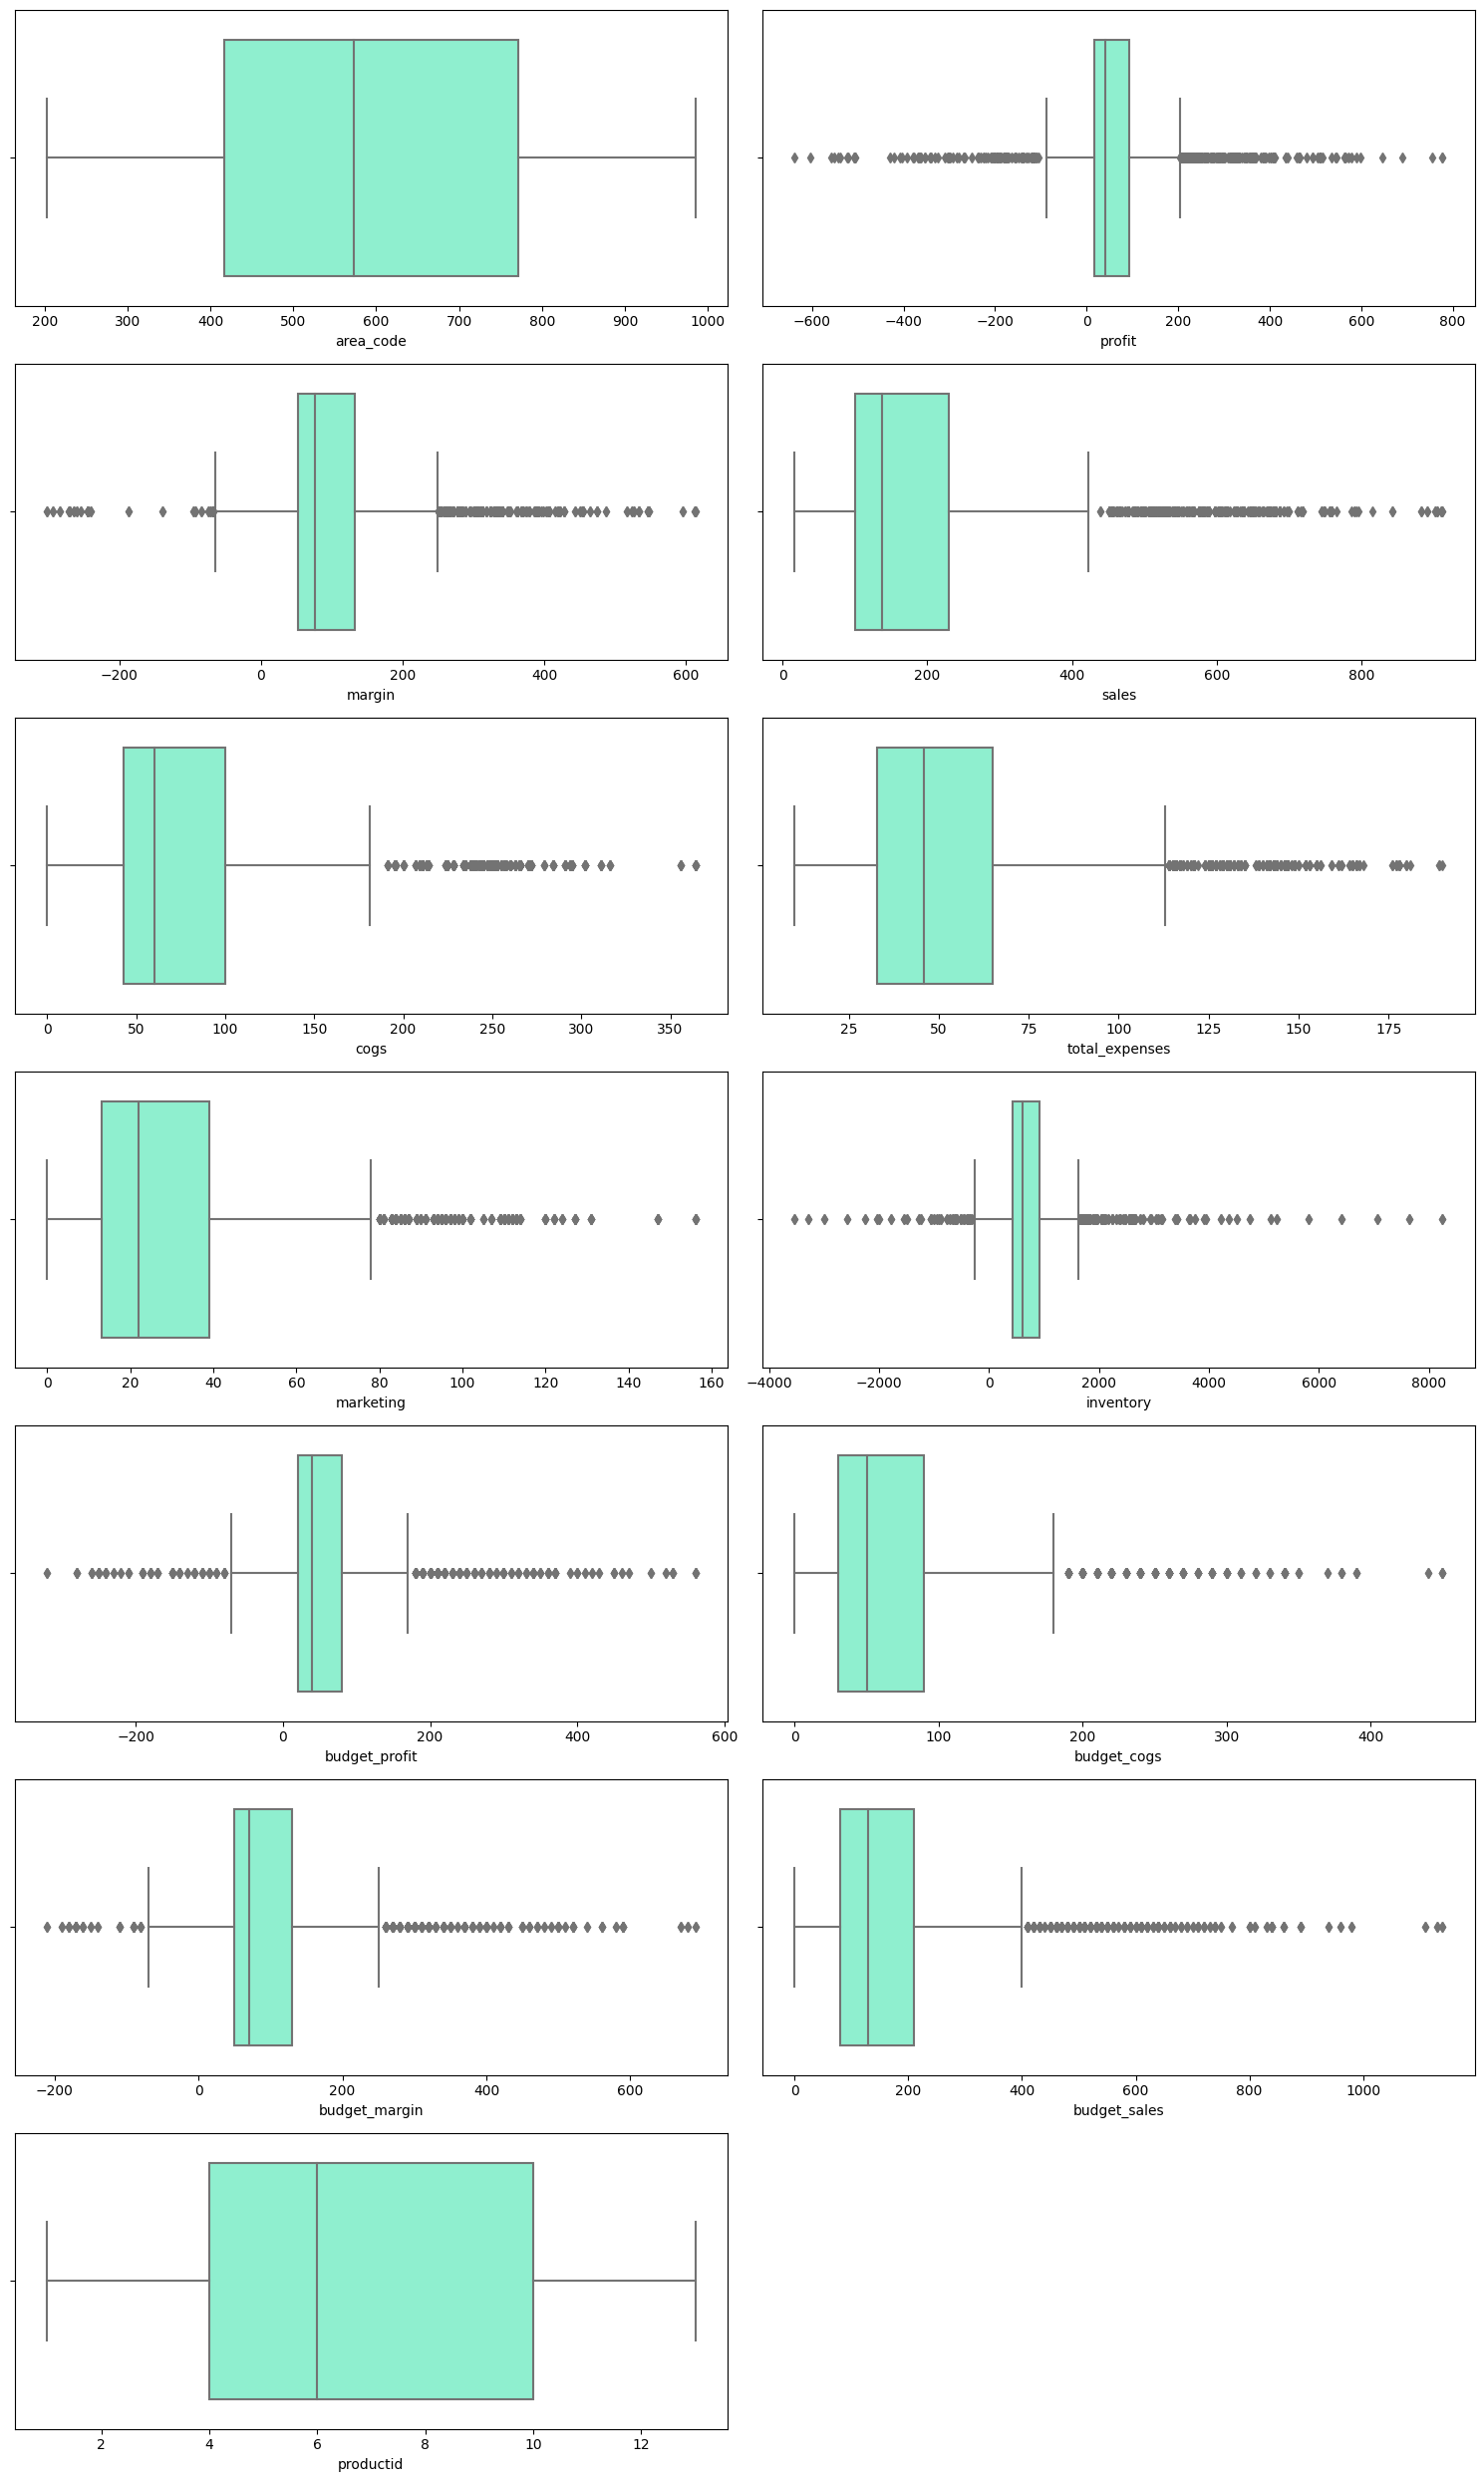

In [12]:
fig, axes = plt.subplots(7, 2, figsize=(15,25))

axes = axes.flat

for i, col in enumerate(sales_num.columns):
    sns.boxplot(x = sales_num[col], data = sales_num, ax=axes[i], color = "aquamarine")

fig.delaxes(axes[-1])    
plt.tight_layout()
plt.show();

- Examinamos la columna "Profit" para verla más en detalle, ya que es nuestra variable respuesta.

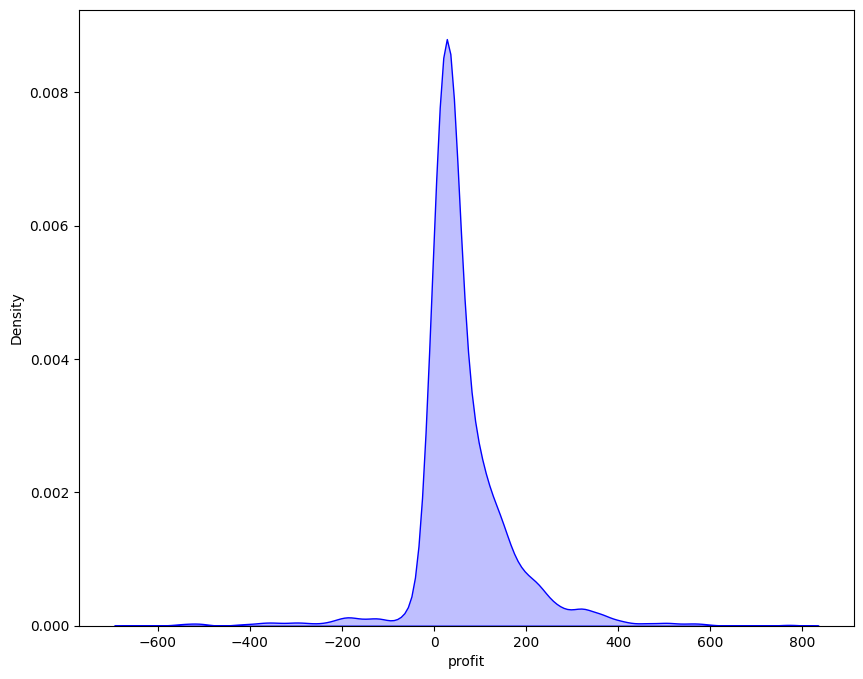

In [14]:
# vamos a ver como está distribuida nuestra variable respuesta

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [15]:
# identificamos los outliers 

def outliers (lista_col, df):

    dicc_ind = {}

    for col in lista_col:

        Q1 = np.nanpercentile(sales_num[col], 25)
        Q3 = np.nanpercentile(sales_num[col], 75)

        IQR = Q3-Q1

        outlier_step = 1.5*IQR

        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]

        if outliers_data.shape[0] > 0:
            
            dicc_ind[col] = (list(outliers_data.index))

    return dicc_ind

In [16]:
# creamos una lista con nuestras columnas numéricas

lista_col_num = list(sales_num.columns)
lista_col_num

['area_code',
 'profit',
 'margin',
 'sales',
 'cogs',
 'total_expenses',
 'marketing',
 'inventory',
 'budget_profit',
 'budget_cogs',
 'budget_margin',
 'budget_sales',
 'productid']

In [17]:
ind = outliers(lista_col_num, sales)

In [18]:
ind.keys()

dict_keys(['profit', 'margin', 'sales', 'cogs', 'total_expenses', 'marketing', 'inventory', 'budget_profit', 'budget_cogs', 'budget_margin', 'budget_sales'])

In [19]:
# sustituimos los outliers por la mediana

for k, v in ind.items():
    median = (sales[k]).median()
    for i in v:
        sales.loc[i,k] = median

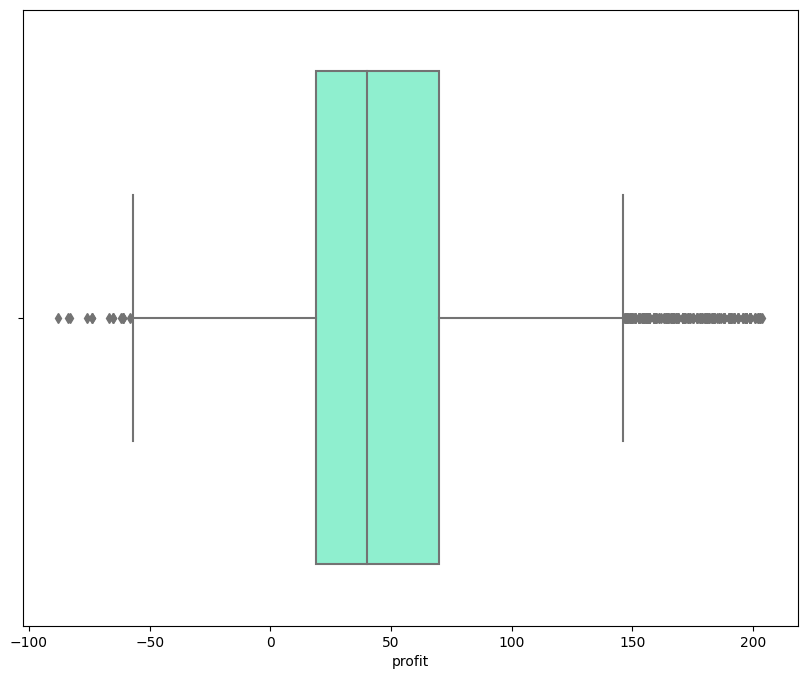

In [20]:
# comprobamos visualmente que los outliers para la columna "Profit" se han modificado por la mediana

sns.boxplot(x = sales["profit"], data = sales, color = "aquamarine")

plt.show();

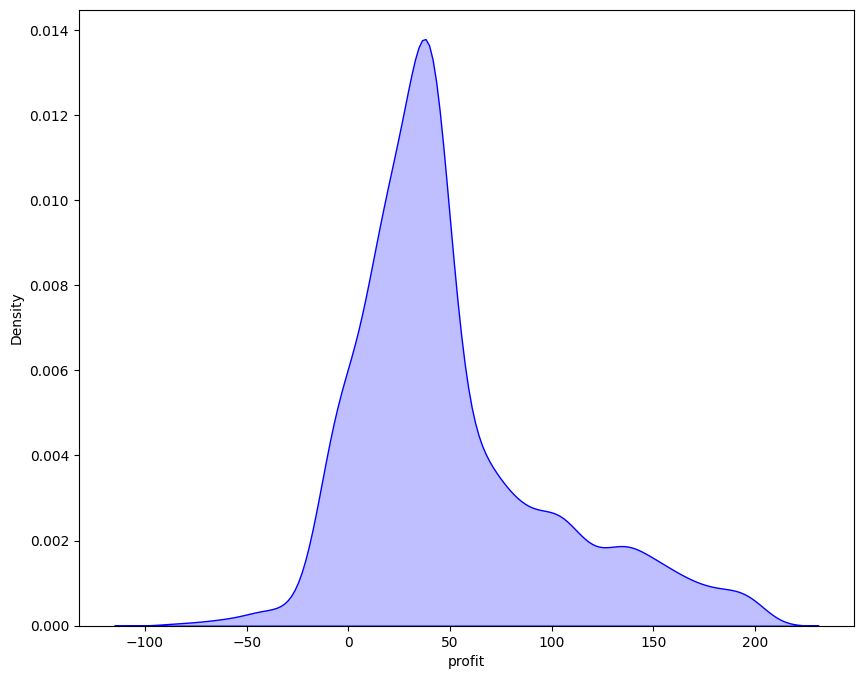

In [21]:

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

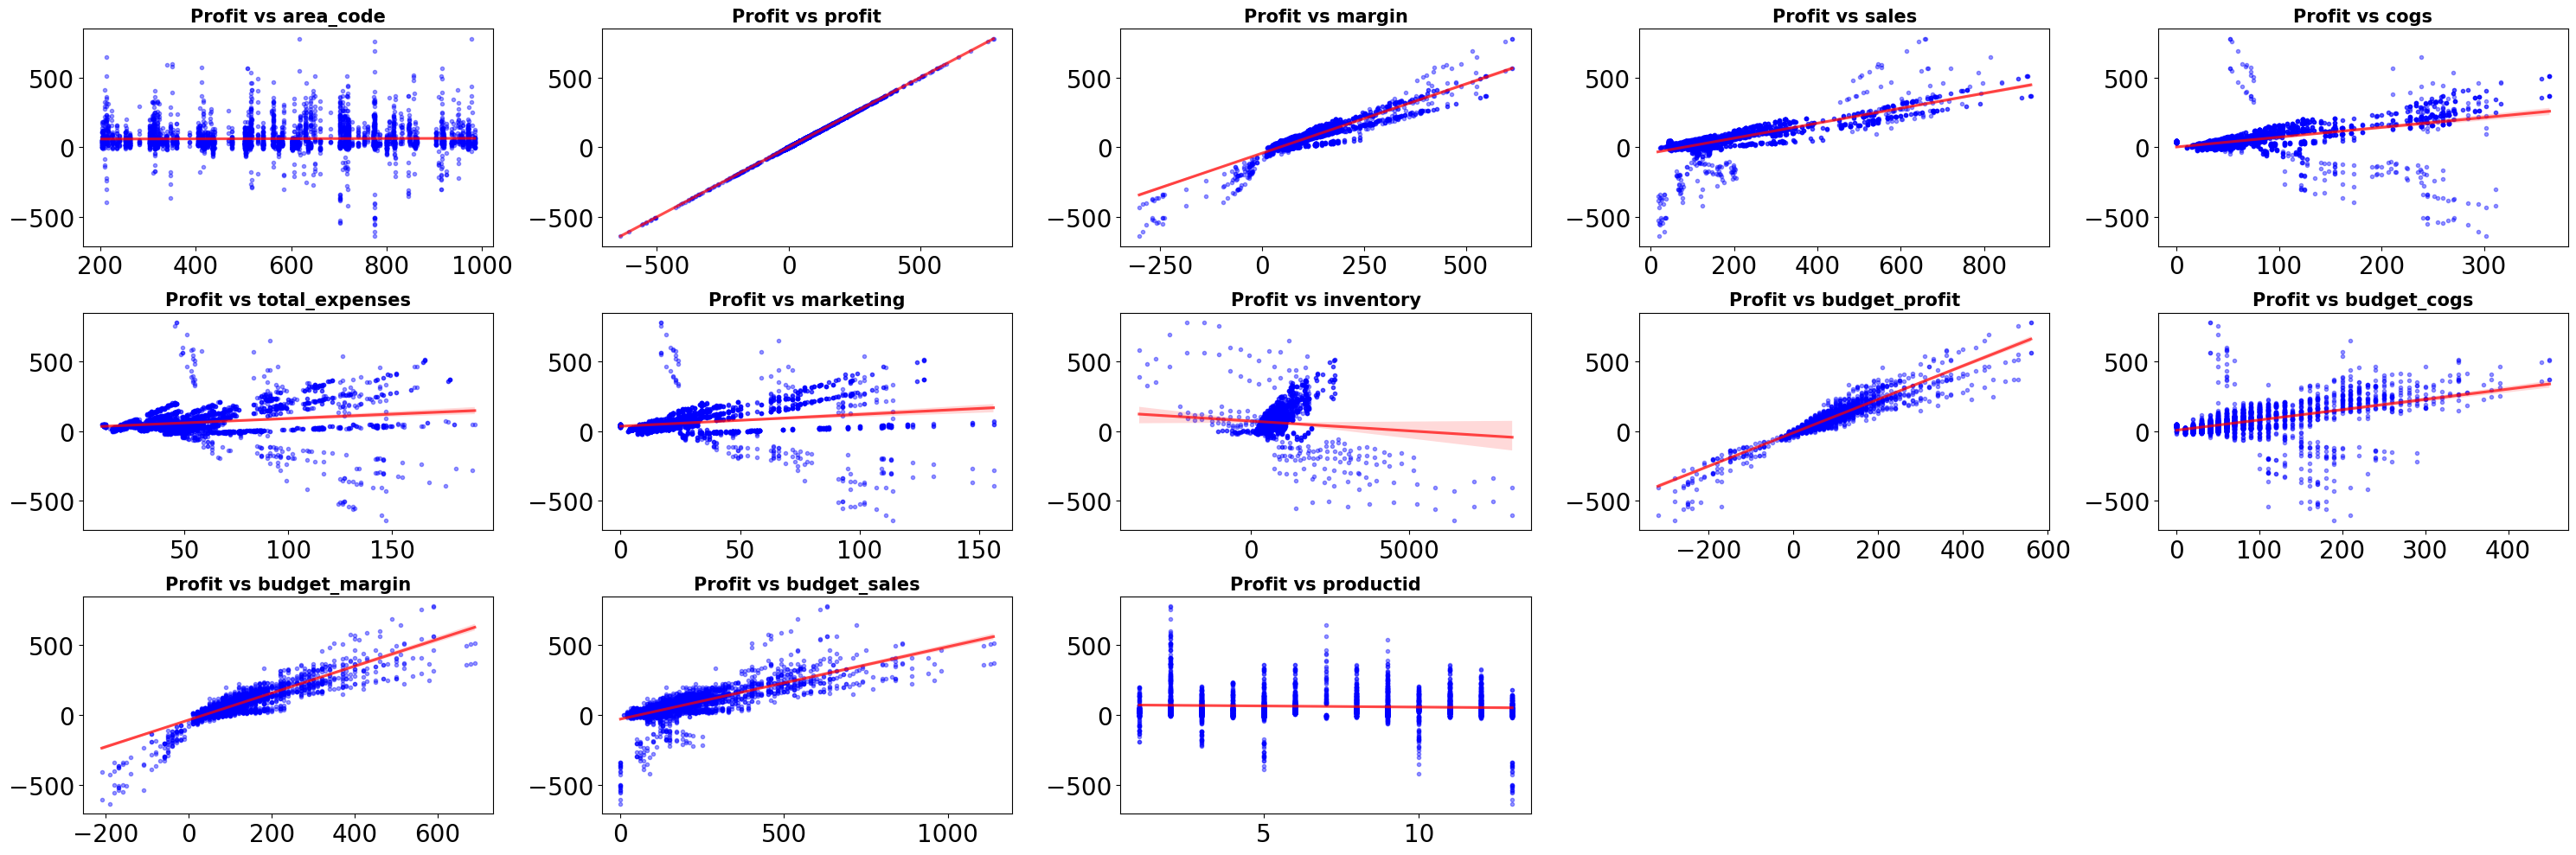

In [22]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# Queremos ver qué variables están más relacionadas con Sales
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))


axes = axes.flat

columnas_numeric = sales_num.columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = sales_num[colum], 
        y = sales_num["profit"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Profit vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

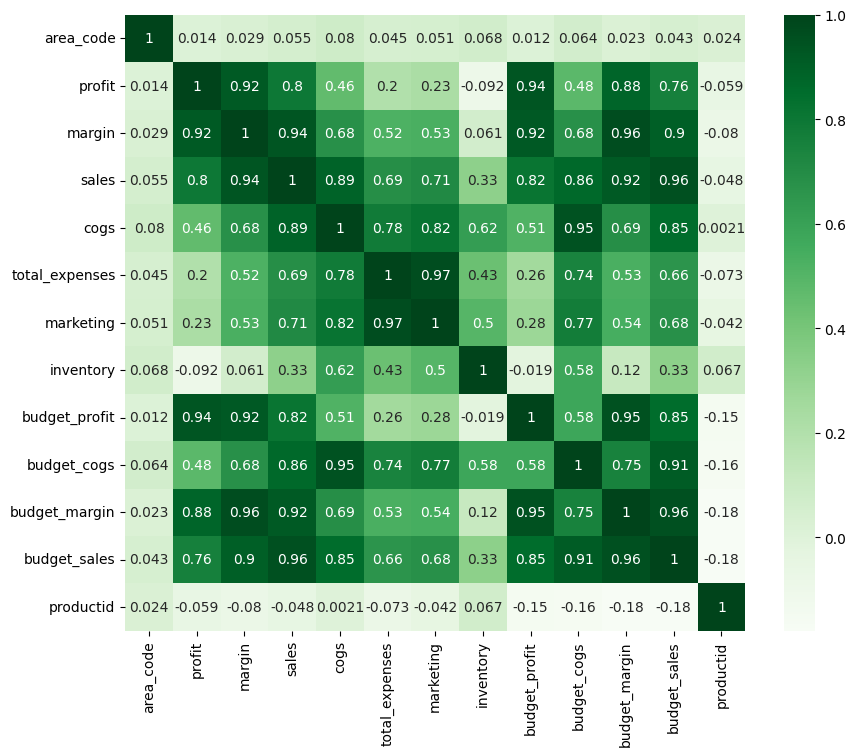

In [23]:
# hacemos un heatmap para observar la correlación entre todas las variables numéricas

sns.heatmap(sales_num.corr(), 
           cmap = "Greens", 
           annot = True);

In [24]:
sales.to_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv")